In [36]:
import matplotlib.pyplot as plt
import pandas as pd
from loguru import logger

n = 30
instance = "Du62"
algorithm = "RL+遗传算法"
# file_path = f"/Users/maoyan/Codes/Python/gym-flp-fbs/Files/ExpResult/{instance}-模拟退火算法1.xlsx"
file_path = f"/Users/maoyan/Codes/Python/gym-flp-fbs/Files/ExpResult/{instance}-{algorithm}.xlsx"
is_repair = True
# 提取数据
datas = []
df = pd.read_excel(file_path)
logger.info("文件读取成功")
logger.info(df)
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # 或者 ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题


2025-05-15 14:46:21.385 | INFO     | __main__:<module>:14 - 文件读取成功
2025-05-15 14:46:21.385 | INFO     | __main__:<module>:15 -       实例       算法  迭代次数                                                  解  \
0   Du62  RL+遗传算法   620  [[33, 4, 23, 18, 62, 40, 13, 6], [51, 22, 34, ...   
1   Du62  RL+遗传算法   620  [[48, 46, 49, 15, 58, 37, 17], [54, 42, 52, 27...   
2   Du62  RL+遗传算法   620  [[17, 51, 41, 40, 37, 9, 15], [14, 8, 49, 18, ...   
3   Du62  RL+遗传算法   620  [[9, 26, 8, 45, 39, 33, 17], [31, 12, 50, 30, ...   
4   Du62  RL+遗传算法   620  [[7, 54, 22, 41, 19, 6, 13], [39, 49, 40, 4, 3...   
5   Du62  RL+遗传算法   620  [[17, 55, 45, 34, 62, 10, 48], [33, 36, 23, 38...   
6   Du62  RL+遗传算法   620  [[15, 9, 24, 23, 28, 6, 17], [46, 5, 18, 57, 1...   
7   Du62  RL+遗传算法   620  [[14, 7, 49, 46, 9, 54, 15, 48], [39, 42, 44, ...   
8   Du62  RL+遗传算法   620  [[46, 9, 31, 37, 26, 4, 14], [7, 22, 49, 44, 4...   
9   Du62  RL+遗传算法   620  [[9, 14, 62, 22, 26, 45, 7], [46, 10, 12, 50, ...   
10  Du62  RL+遗传

In [37]:
groups = df.groupby('备注')
# 使用不同颜色和线型绘制
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']
line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', '^', 'D', '*', 'x', '+']
# 创建一个足够大的图形以容纳标注
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [35]:
logger.info(groups)
logger.info(len(groups))
for name, group in groups:
    logger.info(name)
    logger.info(group)


2025-05-14 20:01:17.267 | INFO     | __main__:<module>:1 - <pandas.core.groupby.generic.DataFrameGroupBy object at 0x1221e8f70>
2025-05-14 20:01:17.269 | INFO     | __main__:<module>:2 - 0


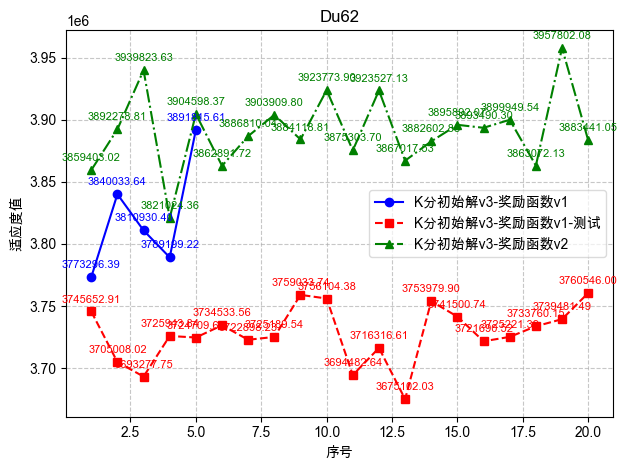

In [38]:


# 过滤器
# 过滤掉group_name 包含随机的
# groups = [(group_name, group_df) for group_name, group_df in groups if '随机' not in group_name]

# 将每一组的值进行排序
# for group_name, group_df in groups:
#     # 排序
#     group_df.sort_values(by='适应度值', ascending=True, inplace=True)
#     # 重新索引
#     group_df.reset_index(drop=True, inplace=True)
#     # 重新赋值
#     groups = [(group_name, group_df) for group_name, group_df in groups if group_name == group_name]


for i, (group_name, group_df) in enumerate(groups):
    # 创建从1开始的x轴序号
    x_values = range(1, len(group_df) + 1)
    y_values = group_df.适应度值.values
    
    color_idx = i % len(colors)
    style_idx = i % len(line_styles)
    marker_idx = i % len(markers)
    
    # 绘制折线
    plt.plot(x_values, y_values, 
             label=group_name,
             color=colors[color_idx],
             linestyle=line_styles[style_idx],
             marker=markers[marker_idx],
             markersize=6)
    
    # 在每个点上添加标注
    for x, y in zip(x_values, y_values):
        plt.annotate(f'{y:.2f}',  # 保留两位小数
                    xy=(x, y),  # 点的位置
                    xytext=(0, 5),  # 文字与点的相对位置（稍微向上偏移）
                    textcoords='offset points',  # 使用偏移坐标
                    ha='center',  # 水平居中对齐
                    va='bottom',  # 垂直底部对齐
                    fontsize=8,  # 字体大小
                    color=colors[color_idx])  # 使用与线相同的颜色
    
# 添加标题和标签
plt.title(instance)
plt.xlabel('序号')
plt.ylabel('适应度值')

# 显示图例并优化位置
plt.legend(loc='best', frameon=True, fancybox=True, framealpha=0.7)

# 添加网格线以便更好地查看
plt.grid(True, linestyle='--', alpha=0.7)

# 优化图表边距
plt.tight_layout()

plt.show()